In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv("../data/DE_human_values_raw.csv")
pd.set_option('display.max_columns', 500)

In [4]:
df.head()

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,pspwght,pweight,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
0,DE,ESS1-8e01,1.0,12.12.2018,84321,ESS7e02_2,7,2.2,10000011,0.531346,0.607555,2.304126,2.0,4.0,1.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,4.0
1,DE,ESS1-8e01,1.0,12.12.2018,84322,ESS7e02_2,7,2.2,10000021,0.531346,0.462666,2.304126,2.0,5.0,2.0,5.0,3.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,3.0,2.0,5.0,2.0,5.0,2.0,2.0,1.0,2.0
2,DE,ESS1-8e01,1.0,12.12.2018,84323,ESS7e02_2,7,2.2,10000051,1.227808,0.640290,2.304126,4.0,5.0,1.0,3.0,2.0,3.0,5.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,4.0,2.0,4.0,2.0,2.0,4.0,3.0
3,DE,ESS1-8e01,1.0,12.12.2018,84324,ESS7e02_2,7,2.2,10000061,1.227808,1.142616,2.304126,2.0,6.0,2.0,5.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,6.0,3.0,5.0,1.0,1.0,2.0,3.0
4,DE,ESS1-8e01,1.0,12.12.2018,84325,ESS7e02_2,7,2.2,10000111,1.227808,0.852731,2.304126,1.0,5.0,2.0,3.0,3.0,4.0,4.0,2.0,3.0,4.0,2.0,2.0,5.0,4.0,4.0,6.0,4.0,2.0,3.0,2.0,4.0


In [5]:
df.columns

Index(['cntry', 'cname', 'cedition', 'cproddat', 'cseqno', 'name', 'essround',
       'edition', 'idno', 'dweight', 'pspwght', 'pweight', 'ipcrtiv',
       'imprich', 'ipeqopt', 'ipshabt', 'impsafe', 'impdiff', 'ipfrule',
       'ipudrst', 'ipmodst', 'ipgdtim', 'impfree', 'iphlppl', 'ipsuces',
       'ipstrgv', 'ipadvnt', 'ipbhprp', 'iprspot', 'iplylfr', 'impenv',
       'imptrad', 'impfun'],
      dtype='object')

In [10]:
de = df.drop(columns=['cname', 
                 'cedition', 
                 'cproddat', 
                 'cseqno', 
                 'name',
                 'edition',
                 'dweight', 
                 'pspwght', 
                 'pweight'])

In [11]:
de.shape

(5897, 24)

In [14]:
cols = {'ipcrtiv':'new_ideas',
        'imprich':'rich',
        'ipeqopt':'equality',
        'ipshabt':'abilities',
        'impsafe':'safety',
        'impdiff':'new_diff',
        'ipfrule':'obey',
        'ipudrst':'understand_diff',
        'ipmodst':'modesty',
        'ipgdtim':'good_time',
        'impfree':'freedom',
        'iphlppl':'help_others',
        'ipsuces':'success',
        'ipstrgv':'strong_gov',
        'ipadvnt':'adventures',
        'ipbhprp':'behave',
        'iprspot':'get_respect',
        'iplylfr':'loyalty',
        'impenv':'nature',
        'imptrad':'traditions',
        'impfun':'fun_pleasure',
        'cntry':'country',
        'essround':'round'}

In [16]:
de_v = de.rename(columns=cols)

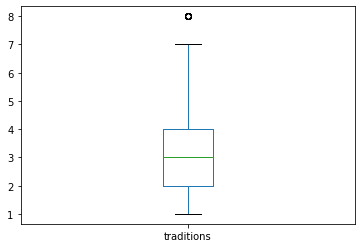

In [24]:
de_v["traditions"].plot(kind="box")

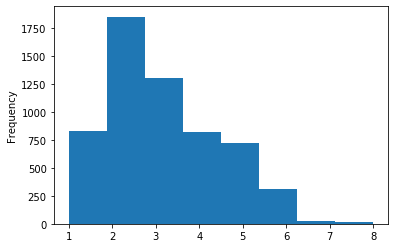

In [27]:
de_v["traditions"].plot(kind="hist", bins=8)

In [29]:
de_v.describe()

,round,idno,new_ideas,rich,equality,abilities,safety,new_diff,obey,understand_diff,modesty,good_time,freedom,help_others,success,strong_gov,adventures,behave,get_respect,loyalty,nature,traditions,fun_pleasure
count,5897.000000,5.897000e+03,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000
mean,7.483636,1.051362e+07,2.417220,4.467245,2.018547,3.631615,2.513697,2.995066,3.623958,2.093415,2.649821,2.464693,1.955590,2.001872,3.143270,2.355283,4.269695,3.017866,3.503318,1.635358,2.094946,2.976689,3.172707
std,0.499775,1.604670e+06,1.254873,1.203647,1.119249,1.408875,1.328854,1.388520,1.487236,1.004560,1.265162,1.202301,1.058967,0.968617,1.354804,1.303643,1.387703,1.377091,1.393556,0.853612,1.072985,1.457230,1.375148
min,7.000000,1.000000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.000000,1.000548e+07,2.000000,4.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
50%,7.000000,1.001830e+07,2.000000,5.000000,2.000000,4.000000,2.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000
75%,8.000000,1.006633e+07,3.000000,5.000000,2.000000,5.000000,3.000000,4.000000,5.000000,2.000000,3.000000,3.000000,2.000000,2.000000,4.000000,3.000000,5.000000,4.000000,5.000000,2.000000,3.000000,4.000000,4.000000
max,8.000000,1.930005e+07,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [32]:
de_v.shape

(5897, 24)

In [69]:
de_v["idno"].value_counts()

10001421    2
10004621    2
10005171    2
10006131    2
10008411    2
           ..
10036582    1
10048872    1
10001769    1
10003818    1
13000227    1
Name: idno, Length: 5820, dtype: int64

In [71]:
de_v[de_v["idno"]==10004621]

,country,round,idno,new_ideas,rich,equality,abilities,safety,new_diff,obey,understand_diff,modesty,good_time,freedom,help_others,success,strong_gov,adventures,behave,get_respect,loyalty,nature,traditions,fun_pleasure
131,DE,7,10004621,3.0,4.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,2.0,3.0
4155,DE,8,10004621,1.0,3.0,3.0,2.0,2.0,2.0,4.0,2.0,3.0,3.0,1.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,3.0,1.0,2.0


### Let´s compare values with left_right scale

In [30]:
lr_raw = pd.read_csv("../data/DE_left_right_7_8_raw.csv")

In [31]:
lr_raw.head()

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,pspwght,pweight,lrscale,prtvede1,prtclede
0,DE,ESS1-8e01,1.0,12.12.2018,84321,ESS7e02_2,7,2.2,10000011,0.531346,0.607555,2.304126,4,2,66
1,DE,ESS1-8e01,1.0,12.12.2018,84322,ESS7e02_2,7,2.2,10000021,0.531346,0.462666,2.304126,5,1,1
2,DE,ESS1-8e01,1.0,12.12.2018,84323,ESS7e02_2,7,2.2,10000051,1.227808,0.640290,2.304126,6,1,66
3,DE,ESS1-8e01,1.0,12.12.2018,84324,ESS7e02_2,7,2.2,10000061,1.227808,1.142616,2.304126,5,1,66
4,DE,ESS1-8e01,1.0,12.12.2018,84325,ESS7e02_2,7,2.2,10000111,1.227808,0.852731,2.304126,5,1,1


In [34]:
lr_raw.columns

Index(['cntry', 'cname', 'cedition', 'cproddat', 'cseqno', 'name', 'essround',
       'edition', 'idno', 'dweight', 'pspwght', 'pweight', 'lrscale',
       'prtvede1', 'prtclede'],
      dtype='object')

In [35]:
de_lr = lr_raw.drop(columns=['cname', 
                 'cedition', 
                 'cproddat', 
                 'cseqno', 
                 'name',
                 'edition',
                 'dweight', 
                 'pspwght', 
                 'pweight'])

In [45]:
de_lr = de_lr.rename(columns={'cntry':'country',
                              'essround':'round',
                              'lrscale':'left_right',
                              'prtvede1':'p_voted',
                              'prtclede':'p_close'})

In [79]:
de_lr.head()
#left_right --> In politics people sometimes talk of “left” and “right”. 
#Using this card, where would you place yourself on this scale?
#Where 0 means the left and 10 means the right.

,country,round,idno,left_right,p_voted,p_close
0,DE,7,10000011,4,2,66
1,DE,7,10000021,5,1,1
2,DE,7,10000051,6,1,66
3,DE,7,10000061,5,1,66
4,DE,7,10000111,5,1,1


### Now we merged both tables

In [56]:
de_78 = de_v.merge(de_lr, on="idno")

In [57]:
de_78.head()

,country_x,round_x,idno,new_ideas,rich,equality,abilities,safety,new_diff,obey,understand_diff,modesty,good_time,freedom,help_others,success,strong_gov,adventures,behave,get_respect,loyalty,nature,traditions,fun_pleasure,country_y,round_y,left_right,p_voted,p_close
0,DE,7,10000011,2.0,4.0,1.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,4.0,DE,7,4,2,66
1,DE,7,10000021,2.0,5.0,2.0,5.0,3.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,3.0,2.0,5.0,2.0,5.0,2.0,2.0,1.0,2.0,DE,7,5,1,1
2,DE,7,10000051,4.0,5.0,1.0,3.0,2.0,3.0,5.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,4.0,2.0,4.0,2.0,2.0,4.0,3.0,DE,7,6,1,66
3,DE,7,10000061,2.0,6.0,2.0,5.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,6.0,3.0,5.0,1.0,1.0,2.0,3.0,DE,7,5,1,66
4,DE,7,10000111,1.0,5.0,2.0,3.0,3.0,4.0,4.0,2.0,3.0,4.0,2.0,2.0,5.0,4.0,4.0,6.0,4.0,2.0,3.0,2.0,4.0,DE,7,5,1,1


In [77]:
de_78 = de_78.drop_duplicates(subset="idno").drop(columns=['country_y','round_y'])

In [78]:
de_78.shape

(5820, 27)

In [93]:
### Now we look for correlations, but first we have to group by "left_right"
de_reg = de_78.groupby('left_right').agg({'idno':'count',
                                          'new_ideas':'mean',
                                          'rich':'mean',
                                          'equality':'mean',
                                          'abilities':'mean',
                                          'safety':'mean',
                                          'new_diff':'mean',
                                          'obey':'mean',
                                          'understand_diff':'mean',
                                          'modesty':'mean',
                                          'good_time':'mean',
                                          'freedom': 'mean', 
                                          'help_others':'mean', 
                                          'success':'mean',
                                          'strong_gov':'mean', 
                                          'adventures':'mean', 
                                          'behave':'mean',
                                          'get_respect':'mean',
                                          'loyalty':'mean',
                                          'nature':'mean',
                                          'traditions':'mean',
                                          'fun_pleasure':'mean'}).reset_index()

In [97]:
de_reg.head(15)

,left_right,idno,new_ideas,rich,equality,abilities,safety,new_diff,obey,understand_diff,modesty,good_time,freedom,help_others,success,strong_gov,adventures,behave,get_respect,loyalty,nature,traditions,fun_pleasure
0,0,224,2.312500,4.723214,1.700893,3.620536,2.691964,2.741071,3.812500,1.883929,2.531250,2.348214,1.888393,1.866071,3.098214,2.517857,4.093750,3.035714,3.584821,1.468750,1.723214,3.209821,3.017857
1,1,127,2.464567,4.574803,1.700787,3.322835,2.755906,2.677165,3.897638,1.944882,2.645669,2.433071,1.834646,2.039370,3.244094,2.677165,3.866142,3.133858,3.551181,1.669291,2.023622,3.409449,3.047244
2,2,444,2.380631,4.630631,1.743243,3.644144,2.605856,2.932432,3.750000,1.914414,2.594595,2.468468,1.851351,1.882883,3.220721,2.644144,4.290541,3.184685,3.605856,1.641892,1.878378,3.256757,3.301802
3,3,848,2.303783,4.541371,1.793144,3.632388,2.769504,2.964539,3.924350,1.947991,2.737589,2.394799,1.910165,1.981087,3.192671,2.539007,4.126478,3.236407,3.620567,1.562648,1.964539,3.297872,3.146572
4,4,715,2.481119,4.432168,1.966434,3.661538,2.650350,3.033566,3.696503,2.089510,2.721678,2.481119,1.976224,2.061538,3.180420,2.531469,4.286713,3.092308,3.393007,1.616783,2.075524,3.205594,3.218182
5,5,2055,2.409091,4.475073,2.037634,3.655425,2.379277,3.017107,3.513685,2.109482,2.609971,2.490225,1.987292,1.970186,3.143695,2.229228,4.321114,2.956500,3.495112,1.633431,2.168622,2.847507,3.153959
6,6,549,2.467890,4.170642,2.304587,3.522936,2.425688,3.023853,3.473394,2.148624,2.601835,2.414679,1.906422,2.055046,3.011009,2.141284,4.212844,2.875229,3.370642,1.656881,2.220183,2.722936,3.144954
7,7,369,2.332425,4.313351,2.242507,3.544959,2.397820,2.983651,3.490463,2.239782,2.640327,2.457766,1.918256,2.054496,2.970027,2.185286,4.239782,2.885559,3.403270,1.618529,2.182561,2.536785,3.182561
8,8,185,2.413043,4.396739,2.548913,3.690217,2.483696,3.043478,3.195652,2.244565,2.619565,2.500000,1.956522,2.059783,3.000000,2.000000,4.380435,2.793478,3.331522,1.777174,2.081522,2.500000,3.135870
9,9,35,1.914286,3.885714,2.285714,3.085714,2.000000,2.600000,3.028571,2.342857,2.485714,2.085714,1.828571,1.942857,2.742857,1.714286,4.342857,2.628571,3.057143,1.485714,1.885714,2.771429,2.914286


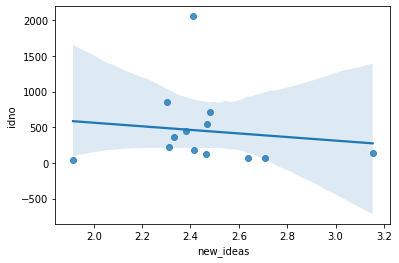

In [102]:
sns.regplot(data=de_reg, x="new_ideas", y="idno")

In [105]:
de_cor = sm.add_constant(de_78)

In [111]:
de_cor.isnull().sum()

const               0
country_x           0
round_x             0
idno                0
new_ideas          20
rich               20
equality           20
abilities          20
safety             20
new_diff           20
obey               20
understand_diff    20
modesty            20
good_time          20
freedom            20
help_others        20
success            20
strong_gov         20
adventures         20
behave             20
get_respect        20
loyalty            20
nature             20
traditions         20
fun_pleasure       20
left_right          0
p_voted             0
p_close             0
dtype: int64

In [113]:
#We drop the rows where the human values are Null
de_cor = de_cor.loc[~de_cor["new_ideas"].isnull()]

In [116]:
y = de_cor["left_right"]
X = de_cor[["const", "new_ideas"]]

lin_reg = sm.OLS(y,X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             left_right   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     50.03
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.70e-12
Time:                        21:32:46   Log-Likelihood:                -23884.
No. Observations:                5800   AIC:                         4.777e+04
Df Residuals:                    5798   BIC:                         4.779e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6210      0.424     10.895      0.000       3.790       5.452
new_ideas      1.1008      0.156      7.073      0.000       0.796       1.406
==============================================================================
Omnibus:                     5496.815   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145331.552
Skew:                           4.871   Prob(JB):                         0.00
Kurtosis:                      25.505   Cond. No.                         6.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""